In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
from sklearn.tree import plot_tree

In [2]:
titanic_data = pd.read_csv(r"C:/Users/ADMIN/Downloads/train.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
y = titanic_data.Survived

In [8]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [9]:
X = X.fillna({'Age': X.Age.median()})

In [10]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
#перетренировали модель.Дерево сильно выросло в глубину.Давайте его ограничем по глубине.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Разобьем выборку на тренировочную и тестовую:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
242,2,29.0,0,0,10.50,False,True,False,False,True
344,2,36.0,0,0,13.00,False,True,False,False,True
170,1,61.0,0,0,33.50,False,True,False,False,True
187,1,45.0,0,0,26.55,False,True,False,False,True
800,2,34.0,0,0,13.00,False,True,False,False,True


In [17]:
X_train.shape

(596, 10)

In [18]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
495,3,28.0,0,0,14.4583,False,True,True,False,False
648,3,28.0,0,0,7.5500,False,True,False,False,True
278,3,7.0,4,1,29.1250,False,True,False,True,False
31,1,28.0,1,0,146.5208,True,False,True,False,False
255,3,29.0,0,2,15.2458,True,False,True,False,False


In [19]:
X_test.shape

(295, 10)

In [20]:
clf.score(X,y)

0.9797979797979798

In [21]:
clf.score(X_train, y_train)

0.9798657718120806

In [22]:
clf.score(X_test,y_test)

0.9796610169491525

In [23]:
# Ограничим глубину дерева:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [24]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [25]:
clf.score(X_train, y_train)

0.8489932885906041

In [26]:
clf.score(X_test,y_test)

0.8067796610169492

In [27]:
max_depth_values=range(1,100)

In [28]:
scores_data=pd.DataFrame()


In [29]:
scores_data=pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)
    train_score=clf.score(X_train, y_train)
    test_score=clf.score(X_test,y_test)

    temp_score_data=pd.DataFrame({'max_depth':[max_depth],'train_score':[train_score],'test_score':[test_score]})
    scores_data=scores_data._append(temp_score_data)

In [30]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.788591,0.783051
0,2,0.788591,0.783051
0,3,0.825503,0.803390
0,4,0.843960,0.813559
0,5,0.848993,0.806780


In [31]:
scores_data_long=pd.melt(scores_data,id_vars=['max_depth'],value_vars=['train_score','test_score'], var_name='set_type',value_name='score')

In [32]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.788591
1,2,train_score,0.788591
2,3,train_score,0.825503
3,4,train_score,0.843960
4,5,train_score,0.848993


<Axes: xlabel='max_depth', ylabel='score'>

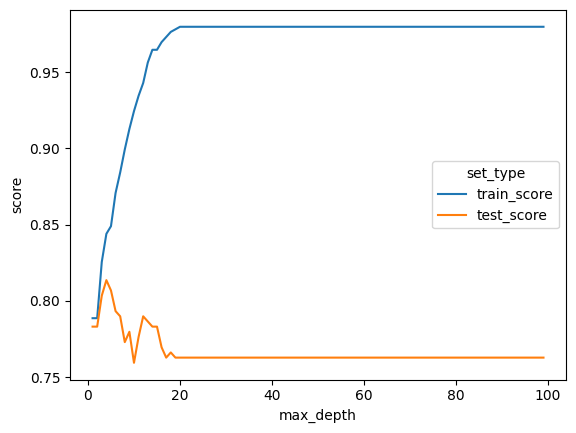

In [33]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(clf,X_train,y_train,cv=5)

array([0.74166667, 0.79831933, 0.77310924, 0.76470588, 0.80672269])

In [36]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

np.float64(0.7769047619047619)

In [37]:
max_depth_values=range(1,100)

In [38]:
scores_data=pd.DataFrame()

In [39]:
scores_data=pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)
    train_score=clf.score(X_train, y_train)
    test_score=clf.score(X_test,y_test)
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    temp_score_data=pd.DataFrame({'max_depth':[max_depth],'train_score':[train_score],'test_score':[test_score],'cross_val_score':[mean_cross_val_score]})
    scores_data=scores_data._append(temp_score_data)

In [40]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.788591,0.783051,0.788655
0,2,0.788591,0.783051,0.770168
0,3,0.825503,0.803390,0.805378
0,4,0.843960,0.813559,0.810420
0,5,0.848993,0.806780,0.783599


In [41]:
scores_data_long=pd.melt(scores_data,id_vars=['max_depth'],value_vars=['train_score','test_score','cross_val_score'], var_name='set_type',value_name='score')

In [42]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.788591
1,2,train_score,0.788591
2,3,train_score,0.825503
3,4,train_score,0.843960
4,5,train_score,0.848993


<Axes: xlabel='max_depth', ylabel='score'>

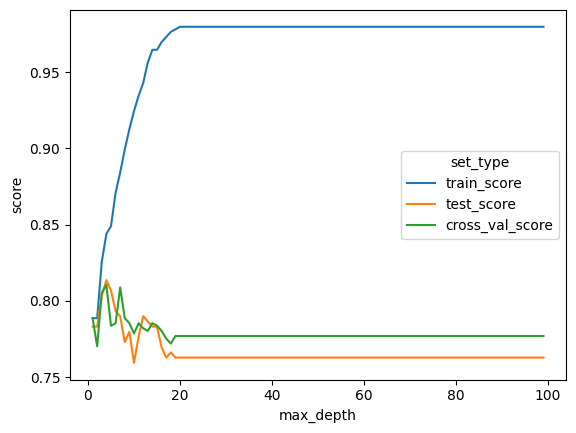

In [43]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [44]:
scores_data_long.query("set_type=='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.788655
199,2,cross_val_score,0.770168
200,3,cross_val_score,0.805378
201,4,cross_val_score,0.810420
202,5,cross_val_score,0.783599
203,6,cross_val_score,0.785238
204,7,cross_val_score,0.808782
205,8,cross_val_score,0.788627
206,9,cross_val_score,0.785280
207,10,cross_val_score,0.778557


In [45]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [46]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

np.float64(0.7322033898305085)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf = tree.DecisionTreeClassifier()

In [49]:
parametrs={'criterion':['gini','entropy'],'max_depth':range(1,30)}

In [50]:
grid_search_cv_cf =GridSearchCV(clf,parametrs,cv=5)

In [51]:
grid_search_cv_cf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [52]:
grid_search_cv_cf.fit(X_train,y_train)

C:\Users\ADMIN\DataScienceProject\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [53]:
grid_search_cv_cf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [54]:
best_clf=grid_search_cv_cf.best_estimator_

In [55]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [56]:
best_clf.score(X_test,y_test)

0.8135593220338984

In [57]:
from sklearn.metrics import precision_score

In [58]:
y_pred=best_clf.predict(X_test)

In [59]:
precision_score(y_test, y_pred)

np.float64(0.7745098039215687)

In [60]:
from sklearn.metrics import recall_score

In [61]:
recall_score(y_test, y_pred)

np.float64(0.7117117117117117)

In [62]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [63]:
y_predicted_prob

array([[0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [1.        , 0.        ],
       [0.01470588, 0.98529412],
       [0.34375   , 0.65625   ],
       [0.60606061, 0.39393939],
       [0.01470588, 0.98529412],
       [0.01470588, 0.98529412],
       [0.60606061, 0.39393939],
       [0.34375   , 0.65625   ],
       [0.85581395, 0.14418605],
       [0.12244898, 0.87755102],
       [0.85581395, 0.14418605],
       [0.12244898, 0.87755102],
       [0.01470588, 0.98529412],
       [0.34375   , 0.65625   ],
       [0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [0.94736842, 0.05263158],
       [0.        , 1.        ],
       [0.85581395, 0.14418605],
       [0.01470588, 0.98529412],
       [0.85581395, 0.14418605],
       [0.60606061, 0.39393939],
       [0.34375   , 0.65625   ],
       [0.01470588, 0.98529412],
       [0.85581395, 0.14418605],
       [0.34375   , 0.65625   ],
       [0.12244898, 0.87755102],
       [0.89473684, 0.10526316],
       [0.

In [64]:
y_predicted_prob[:,1]

array([0.14418605, 0.14418605, 0.        , 0.98529412, 0.65625   ,
       0.39393939, 0.98529412, 0.98529412, 0.39393939, 0.65625   ,
       0.14418605, 0.87755102, 0.14418605, 0.87755102, 0.98529412,
       0.65625   , 0.14418605, 0.14418605, 0.05263158, 1.        ,
       0.14418605, 0.98529412, 0.14418605, 0.39393939, 0.65625   ,
       0.98529412, 0.14418605, 0.65625   , 0.87755102, 0.10526316,
       0.05263158, 0.87755102, 0.14418605, 0.39393939, 0.14418605,
       0.39393939, 0.05263158, 0.14418605, 0.14418605, 0.05263158,
       0.07692308, 0.14418605, 0.14418605, 0.14418605, 0.98529412,
       0.14418605, 0.14418605, 0.98529412, 0.05263158, 0.39393939,
       0.39393939, 0.39393939, 0.87755102, 0.14418605, 0.39393939,
       0.14418605, 0.07692308, 0.10526316, 0.14418605, 0.14418605,
       0.14418605, 0.65625   , 0.98529412, 0.39393939, 0.65625   ,
       0.14418605, 0.87755102, 0.14418605, 0.        , 0.98529412,
       0.87755102, 0.39393939, 0.39393939, 0.14418605, 0.14418

<Axes: >

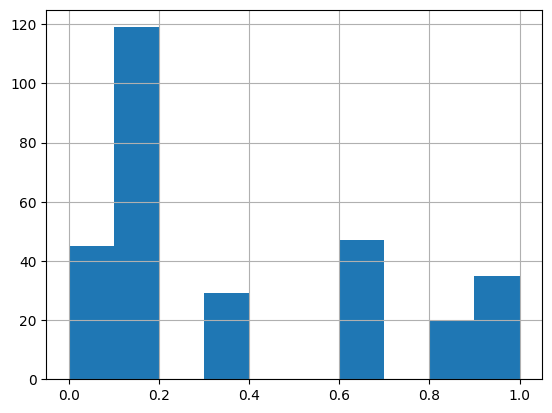

In [65]:
pd.Series(y_predicted_prob[:,1]).hist()

In [66]:
y_pred=np.where(y_predicted_prob[:,1]>0.8,1,0)

In [67]:
precision_score(y_test,y_pred)

np.float64(0.9636363636363636)

In [68]:
recall_score(y_test,y_pred)

np.float64(0.4774774774774775)

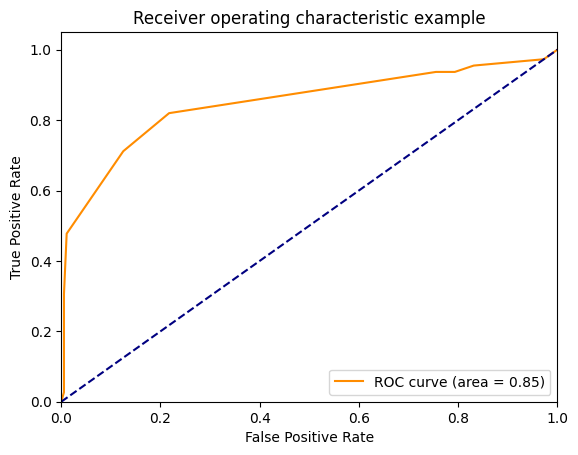

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.Figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [70]:
#График, показывающий зависимость precision, recall, f1 и accuracy

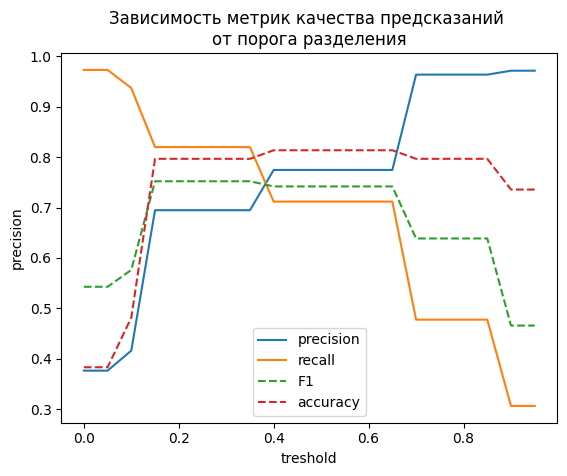

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_scores(tr):
  y_pred = np.where(y_predicted_prob[:,1]>tr, 1, 0)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return precision, recall, f1, accuracy

lst_precision, lst_recall, lst_f1, lst_accuracy = [], [], [], []
for tr in np.arange(0,1,0.05):
    precision, recall, f1, accuracy = get_scores(tr)
    lst_precision.append(precision) 
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_accuracy.append(accuracy)

monitor = pd.DataFrame({'treshold':np.arange(0,1,0.05), 'precision':lst_precision,'recall':lst_recall, 'f1':lst_f1, 'accuracy':lst_accuracy})

sns.lineplot(data=monitor, x='treshold', y='precision', label='precision')
sns.lineplot(data=monitor, x='treshold', y='recall', label='recall')
sns.lineplot(data=monitor, x='treshold', y='f1', label='F1', linestyle='--')
sns.lineplot(data=monitor, x='treshold', y='accuracy', label='accuracy', linestyle='--')
plt.title('Зависимость метрик качества предсказаний \nот порога разделения')
plt.show()

In [72]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=100,min_samples_leaf=18)

In [73]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=18,
                       min_samples_split=100)

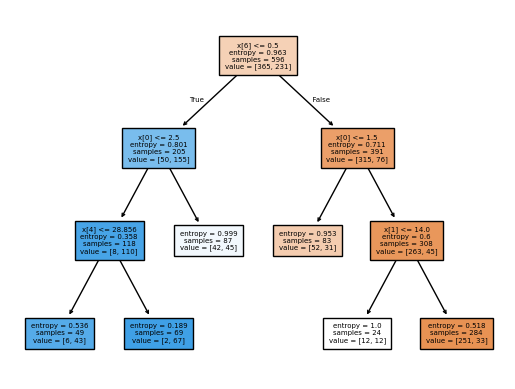

In [74]:
plot_tree(clf,filled=True,fontsize=5);

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_rf = RandomForestClassifier()

In [77]:
parametrs ={'n_estimators':[10,20,30],'max_depth':[2,5,7,10]}

In [78]:
grid_search_cv_cf = GridSearchCV(clf_rf,parametrs,cv=5)

In [79]:
grid_search_cv_cf.fit(X_train,y_train)

C:\Users\ADMIN\DataScienceProject\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [80]:
grid_search_cv_cf.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [81]:
predictions = grid_search_cv_cf.predict(X_test)

In [82]:
predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1])

In [83]:
best_clf=grid_search_cv_cf.best_estimator_

In [84]:
best_clf.score(X_test,y_test)

0.8305084745762712

In [85]:
best_clf.feature_importances_

array([0.1698707 , 0.12023621, 0.053816  , 0.03219322, 0.12442578,
       0.14553414, 0.30417102, 0.01763939, 0.0095727 , 0.02254085])

In [86]:
feature_importances=best_clf.feature_importances_

In [87]:
feature_importances_df =pd.DataFrame({'feature':list(X_train),'feature_importances':feature_importances})

In [88]:
feature_importances_df

,feature,feature_importances
0,Pclass,0.169871
1,Age,0.120236
2,SibSp,0.053816
3,Parch,0.032193
4,Fare,0.124426
5,Sex_female,0.145534
6,Sex_male,0.304171
7,Embarked_C,0.017639
8,Embarked_Q,0.009573
9,Embarked_S,0.022541


In [89]:
#выведем топ переменных, влияющих на выживаемость пассажиров

In [90]:
feature_importances_df.sort_values('feature_importances',ascending=False)

,feature,feature_importances
6,Sex_male,0.304171
0,Pclass,0.169871
5,Sex_female,0.145534
4,Fare,0.124426
1,Age,0.120236
2,SibSp,0.053816
3,Parch,0.032193
9,Embarked_S,0.022541
7,Embarked_C,0.017639
8,Embarked_Q,0.009573


<Axes: >

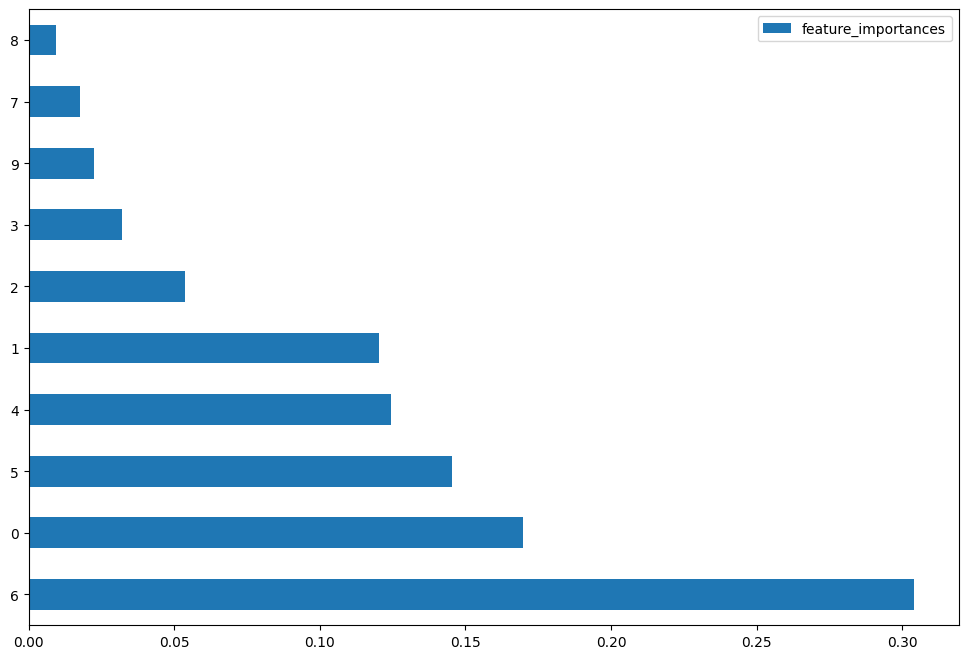

In [91]:
feature_importances_df.sort_values('feature_importances',ascending=False).plot(kind='barh', figsize=(12, 8))